In [1]:
# Loading libraries in R
library(readr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
path <- file.path("~","manning/data/csv","legislation.csv")

In [3]:
# df <- read.csv(path, stringsAsFactors=FALSE,
#                colClasses = c("integer","integer","integer","factor", "integer","character","integer"))

In [4]:
# str(df)

In [5]:
# head(df)

In [6]:
df2 = read_csv(path,show_col_types = FALSE)
head(df2)

id,year,cong,bill_type,bill_no,description,policy
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
38183,1947,80,HR,1,To reduce individual income tax payments,1
38184,1947,80,HR,2,"To amend the Armed Forces Leave Act of 1946 by providing optional cash payment of terminal leave bonds, and for other purposes",16
38185,1947,80,HR,3,"To amend the Armed Forces Leave Act of 1946 to permit future applicants to elect to be compensated for terminal leave in cash in lieu of bonds, to provide that bonds issued under such act shall be redeemable at any time, and for other purposes",16
38186,1947,80,HR,4,To safeguard the admission of evidence in certain cases,12
38187,1947,80,HR,5,To protect honorably discharged veterans in their rights to join or refrain from joining labor and other organizations,16
38188,1947,80,HR,6,To amend the Armed Forces Leave Act of 1946 to provide that bonds issued under such act shall be redeemable at any time,16


In [7]:
# Looking at the columns
spec(df2)

cols(
  id = col_double(),
  year = col_double(),
  cong = col_double(),
  bill_type = col_character(),
  bill_no = col_double(),
  description = col_character(),
  policy = col_double()
)

In [8]:
# Looking at the structure
str(df2)

spec_tbl_df [466,449 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id         : num [1:466449] 38183 38184 38185 38186 38187 ...
 $ year       : num [1:466449] 1947 1947 1947 1947 1947 ...
 $ cong       : num [1:466449] 80 80 80 80 80 80 80 80 80 80 ...
 $ bill_type  : chr [1:466449] "HR" "HR" "HR" "HR" ...
 $ bill_no    : num [1:466449] 1 2 3 4 5 6 7 8 9 10 ...
 $ description: chr [1:466449] "To reduce individual income tax payments" "To amend the Armed Forces Leave Act of 1946 by providing optional cash payment of terminal leave bonds, and for other purposes" "To amend the Armed Forces Leave Act of 1946 to permit future applicants to elect to be compensated for terminal"| __truncated__ "To safeguard the admission of evidence in certain cases" ...
 $ policy     : num [1:466449] 1 16 16 12 16 16 2 5 21 21 ...
 - attr(*, "spec")=
  .. cols(
  ..   id = col_double(),
  ..   year = col_double(),
  ..   cong = col_double(),
  ..   bill_type = col_character(),
  ..   bill_no = col_double(

In [9]:
# type_convert(df2)

In [10]:
glimpse(df2)

Rows: 466,449
Columns: 7
$ id          <dbl> 38183, 38184, 38185, 38186, 38187, 38188, 38189, 38190, 38…
$ year        <dbl> 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947…
$ cong        <dbl> 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80…
$ bill_type   <chr> "HR", "HR", "HR", "HR", "HR", "HR", "HR", "HR", "HR", "HR"…
$ bill_no     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ description <chr> "To reduce individual income tax payments", "To amend the …
$ policy      <dbl> 1, 16, 16, 12, 16, 16, 2, 5, 21, 21, 16, 5, 10, 16, 1, 13,…


### No. of bills by year

In [11]:
df2_year <- df2 %>%  
    select(year,bill_no) %>% 
    count(year,sort=TRUE) %>% 
    rename(total_bills = n)                  

In [12]:
head(df2_year)

year,total_bills
<dbl>,<int>
1969,18697
1967,17390
1971,15379
1973,15011
1965,14573
1975,14192


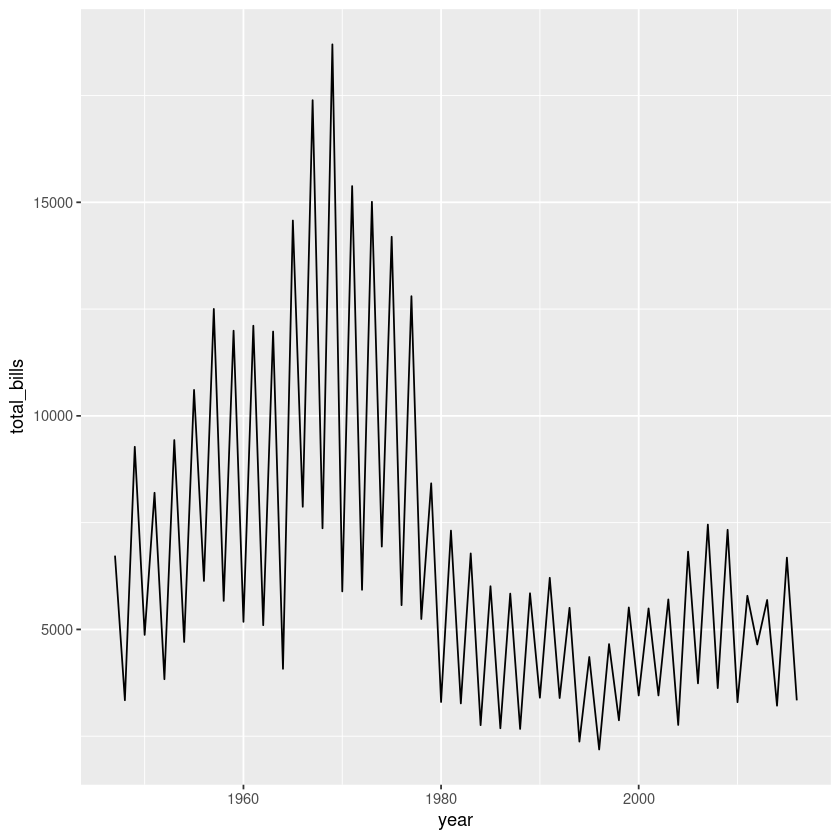

In [13]:
ggplot(df2_year,aes(x=year, y=total_bills)) + geom_line()

### No. of bills by policy area

In [14]:
df2_policy <- df2 %>%  
    select(policy,bill_no) %>% 
    count(policy,sort=TRUE) %>% 
    rename(total_bills = n) %>% 
    na.omit

In [15]:
head(df2_policy)

policy,total_bills
<dbl>,<int>
99,79942
20,50653
21,39135
16,33199
3,27692
15,23135


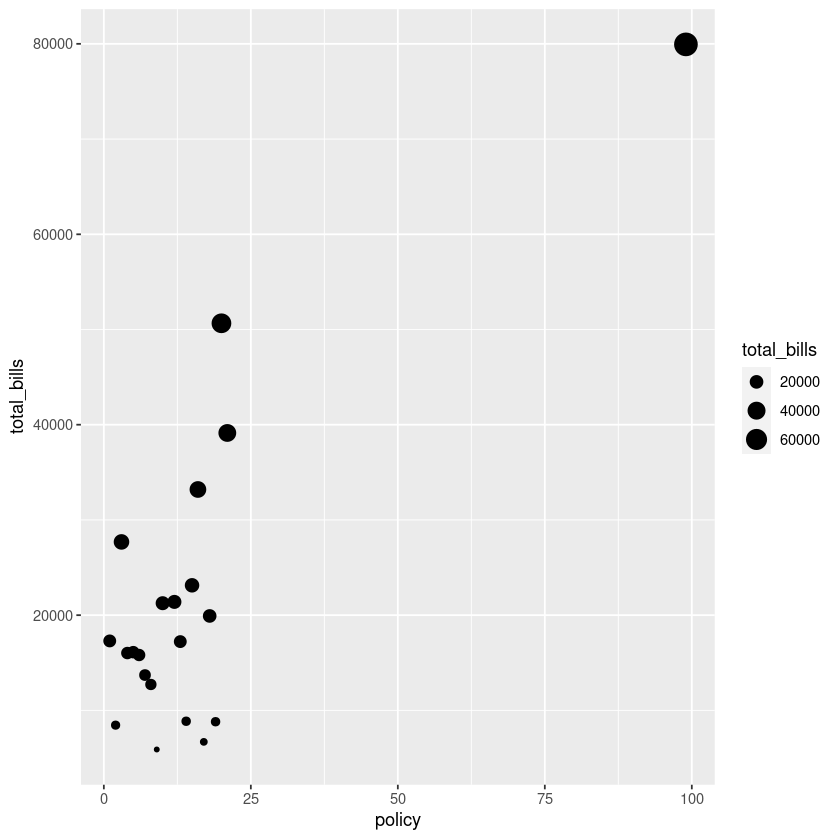

In [16]:
ggplot(df2_policy,aes(x=policy, y=total_bills)) + geom_point(aes(size=total_bills))

### No. of bills by Congressional term

In [17]:
df2_cong <- df2 %>%  
    select(cong,bill_no) %>% 
    count(cong,sort=TRUE) %>% 
    rename(total_bills = n) %>% 
    na.omit

In [18]:
df2_cong

cong,total_bills
<dbl>,<int>
90,24758
91,24588
89,22445
93,21950
92,21307
94,19762
85,18172
95,18045
87,17210


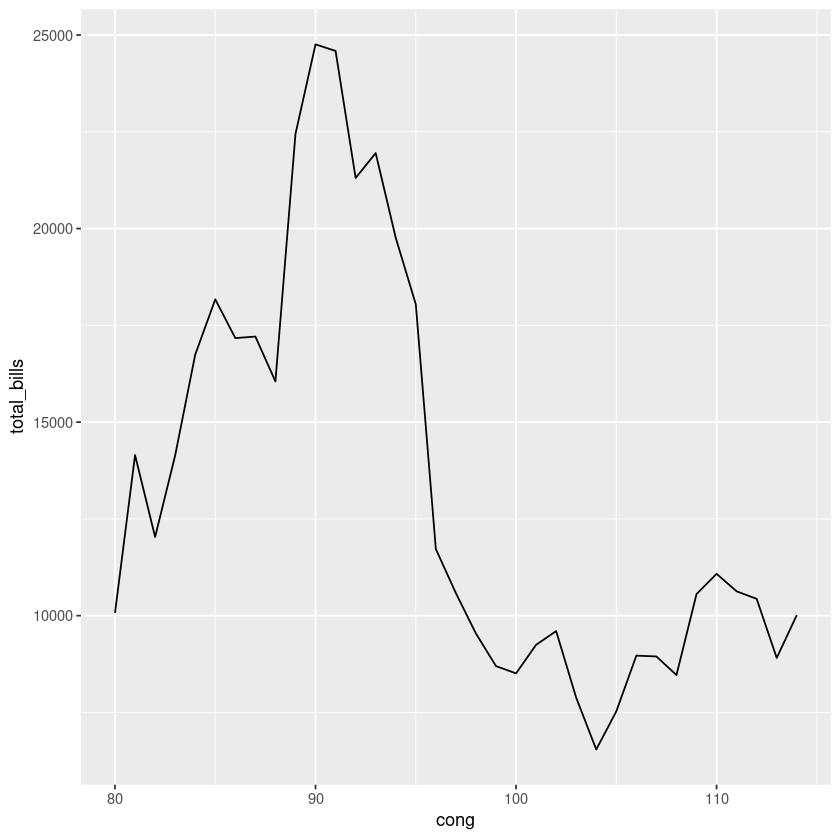

In [19]:
ggplot(df2_cong,aes(x=cong, y=total_bills)) + geom_line()

### Bills classified as "Other" for each Congressional term

In [20]:
df2_cong_others <- df2 %>%
    select(cong,policy) %>%
    filter(policy == 99) %>%
    count(cong,sort=TRUE)%>%
    rename(other_bills = n)    

In [21]:
df2_cong_others

cong,other_bills
<dbl>,<int>
90,8443
91,7256
89,6508
83,5944
85,5751
84,5699
82,4991
87,4742
81,4698


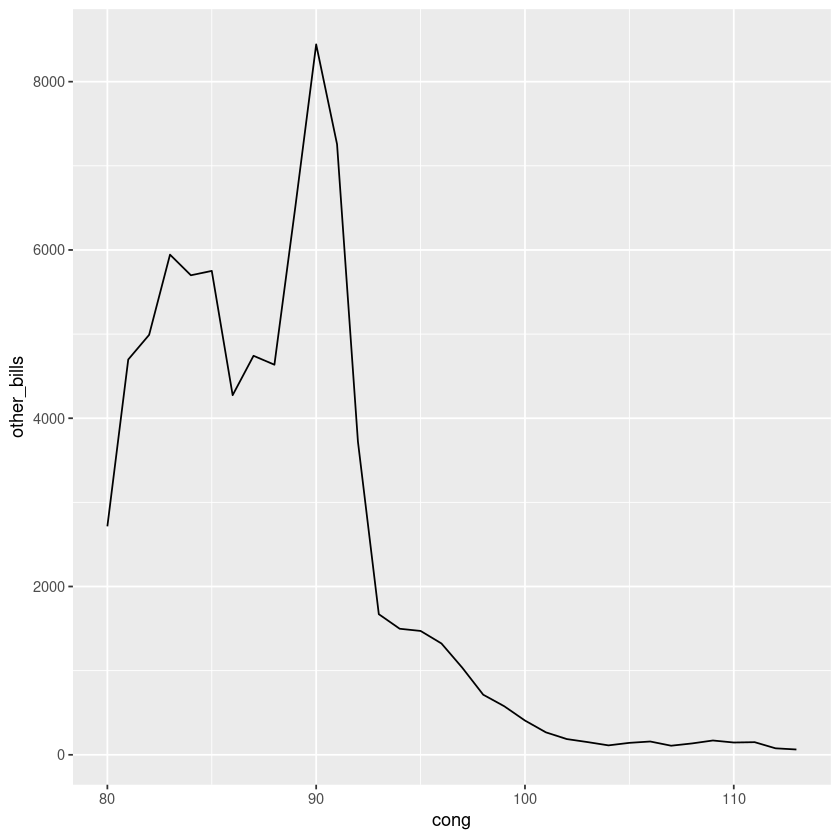

In [22]:
ggplot(df2_cong_others,aes(x=cong, y=other_bills)) + geom_line()